## Load modules
[#Load-ensemble-mean](#Load-ensemble-mean)  
[#Check-monthly-data](#Check-monthly-data)  
[#Annual-Climatology](#Annual-Climatology)  
[#Bias](#Bias)  
[#Annual-cycle-ensemble-mean](#Annual-cycle-ensemble-mean)  
[#Time-series](#Time-series)  
[#Trends](#Trends)  
[#Link-with-orography?](#Link-with-orography?)  

In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # For rectangles
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats # For linregress (trends)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '../../../') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]
Virtual memory usage - total: 126 GB / available: 106 GB / percent used: 15.4 %


## Load model data

In [2]:
# Define period
period = slice('1981','2014')

# Define zone
latlim=(10,50)
lonlim=(60,110)

# Model
institute = 'IPSL'
model = 'IPSL-CM6A-LR'
var = 'snc'
if var in ['tas', 'pr']:
    table = 'Amon'
elif var in ['snc']:
    table = 'LImon'
    
var_label = 'Snow cover extent [%]'
var_label_trends = 'Snow cover extent trends [%/dec]'
var_label_bias = 'Snow cover bias [%]'
cmap='viridis'
levels=plot.arange(0,100,10)

# Load ensemble mean
[#Load-ensemble-mean](#Load-ensemble-mean)  
[#Check-monthly-data](#Check-monthly-data)  
[#Annual-Climatology](#Annual-Climatology)  
[#Bias](#Bias)  
[#Annual-cycle-ensemble-mean](#Annual-cycle-ensemble-mean)  
[#Time-series](#Time-series)  
[#Trends](#Trends)  
[#Link-with-orography?](#Link-with-orography?) 

In [3]:
realization = 'ens'
# Load historical ens
experiment='historical'
da_historical = xr.open_dataarray(
    '/data/mlalande/bdd/CMIP6/CMIP/'+institute+'/'+model+'/'+experiment+'/'+realization+'/'+table+'/'+var+'/gr/latest/'+\
    var+'_'+table+'_'+model+'_'+experiment+'_'+realization+'_gr_198101-201412.nc'
)
# Load amip ens
experiment='amip'
da_amip = xr.open_dataarray(
    '/data/mlalande/bdd/CMIP6/CMIP/'+institute+'/'+model+'/'+experiment+'/'+realization+'/'+table+'/'+var+'/gr/latest/'+\
    var+'_'+table+'_'+model+'_'+experiment+'_'+realization+'_gr_198101-201412.nc'
)

# No ensembles for land-hist and HR
realization = 'r1i1p1f1'
# Load land-hist
da_land_hist = xr.open_mfdataset(
    '/bdd/CMIP6/LS3MIP/'+institute+'/'+model+'/land-hist/'+realization+'/'+table+'/'+var+'/gr/latest/*.nc', combine='by_coords'
).sel(time=period)[var]
# Load HighResMIP
da_HR = xr.open_mfdataset(
    '/bdd/CMIP6/HighResMIP/'+institute+'/IPSL-CM6A-ATM-HR/highresSST-present/'+realization+'/'+table+'/'+var+'/gr/latest/*.nc', combine='by_coords'
).sel(time=period)[var]

## Load obs

#### NOAA Climate Data Record (CDR) of Northern Hemisphere (NH) Snow Cover Extent (SCE), Version 1
https://data.nodc.noaa.gov/cgi-bin/iso?id=gov.noaa.ncdc:C00756

##### Test davos ou lapaz colormaps (with update)
ex: https://climate.rutgers.edu/snowcover/chart_vis.php?ui_year=2020&ui_month=1&ui_set=1

In [4]:
obs_longname = 'NOAA Climate Data Record (CDR) Version 1'
obs_name = 'NOAA CDR'

In [5]:
ds_rutger = xr.open_dataset('/data/mlalande/RUTGERS/nhsce_v01r01_19661004_20191202.nc').sel(time=period)
ds_rutger

<xarray.Dataset>
Dimensions:               (cols: 88, rows: 88, time: 1774)
Coordinates:
  * time                  (time) datetime64[ns] 1981-01-05 ... 2014-12-29
    snow_cover_threshold  float32 ...
    latitude              (rows, cols) float64 ...
    longitude             (rows, cols) float64 ...
Dimensions without coordinates: cols, rows
Data variables:
    coord_system          |S1 ...
    land                  (rows, cols) float32 ...
    area                  (rows, cols) float32 ...
    snow_cover_extent     (time, rows, cols) float32 ...
Attributes:
    Conventions:               CF-1.6
    Metadata_Conventions:      CF-1.6, Unidata Dataset Discovery v1.0, NOAA C...
    standard_name_vocabulary:  CF Standard Name Table (v22, 12 February 2013)
    id:                        nhsce_v01r01_19661004_20191202.nc
    naming_authority:          gov.noaa.ncdc
    metadata_link:             https://doi.org/10.7289/V5N014G9
    title:                     Climate Data Record (CDR) of Northern Hemisphe...
    product_version:           v01r01
    summary:                   The data record for the NH SCE CDR spans from ...
    keywords:                  EARTH SCIENCE > CRYOSPHERE > SNOW/ICE > SNOW C...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Ear...
    platform:                  ESSA, NOAA POES, SMS, DMSP, GOES, TIROS, METEO...
    sensor:                    VIDEO CAMERA, VISSR, VAS, VHRR, AVHRR, VISSR-G...
    cdm_data_type:             Grid
    cdr_program:               NOAA Climate Data Record Program for satellites
    cdr_variable:              snow_cover_extent
    source:                    NOAA NH Weekly SCE, NIC NH IMS SCE
    date_created:              2019-12-03T03:11:23Z
    institution:               Global Snow Lab, Center for Environmental Pred...
    geospatial_lat_units:      degrees_north
    geospatial_lon_units:      degrees_east
    geospatial_lat_min:        0.0
    geospatial_lat_max:        90.0
    geospatial_lon_min:        -180.0
    geospatial_lon_max:        180.0
    spatial_resolution:        Minimum cell area 10676.8 km^2, maximum cell a...
    time_coverage_start:       1966-10-04
    time_coverage_end:         2019-12-02
    license:                   No restrictions on access or use

##### Get the snc variable, keep only land data, convert to % and resample by months  
Resampling with xarray: http://xarray.pydata.org/en/stable/generated/xarray.Dataset.resample.html  
**Offset aliases**: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases  
Here we use: **MS**	month start frequency

In [6]:
# Get the snc variable, keep only land data and convert to %
with xr.set_options(keep_attrs=True):
    obs = ds_rutger.snow_cover_extent.where(ds_rutger.land == 1)*100
    
obs.attrs['units'] = '%'

# Rename lon and lat for the regrid
obs = obs.rename({'longitude': 'lon', 'latitude': 'lat'})

# Resamble data per month (from per week)
obs = obs.resample(time='1MS').mean('time', skipna='False', keep_attrs=True)
obs

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/xarray/core/resample.py:176: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  super().__init__(*args, **kwargs)
/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'snow_cover_extent' (time: 408, rows: 88, cols: 88)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time                  (time) datetime64[ns] 1981-01-01 ... 2014-12-01
    snow_cover_threshold  float32 0.42
    lat                   (rows, cols) float64 0.6592 1.322 ... 1.322 0.6592
    lon                   (rows, cols) float64 145.0 144.3 ... -35.67 -35.0
Dimensions without coordinates: rows, cols
Attributes:
    long_name:      NOAA/NCDC Climate Data Record of snow cover extent
    standard_name:  surface_snow_binary_mask
    grid_mapping:   coord_system
    valid_range:    [0 1]
    flag_values:    [0 1]
    flag_meanings:  no_snow snow_covered
    units:          %

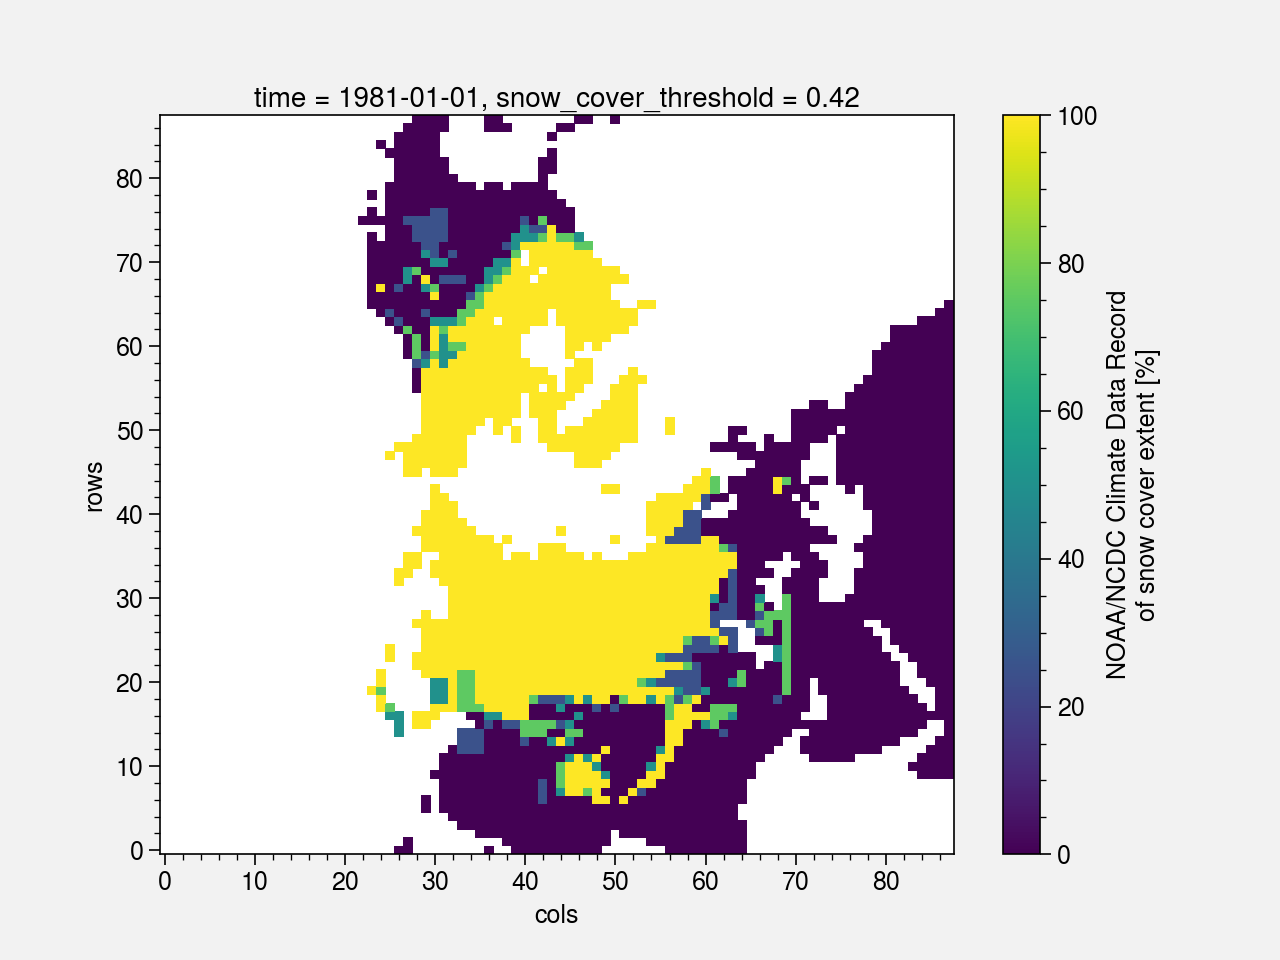

In [7]:
obs[0].plot()

### Regrid using xESMF (https://xesmf.readthedocs.io/en/latest/) 
Value of cells in the new grid that are outside the old grid's domain #15 (https://github.com/JiaweiZhuang/xESMF/issues/15)

In [7]:
# For adding NaN values outside of the grid, otherwise it puts 0 (see issue just up #15)
import scipy
def add_matrix_NaNs(regridder):
    X = regridder.weights
    M = scipy.sparse.csr_matrix(X)
    num_nonzeros = np.diff(M.indptr)
    M[num_nonzeros == 0, 0] = np.NaN
    regridder.weights = scipy.sparse.coo_matrix(M)
    return regridder

# Make the regrider
regridder_obs = xe.Regridder(obs, da_historical, 'bilinear', periodic=False)
regridder_obs = add_matrix_NaNs(regridder_obs)
print(regridder_obs)

# Regrid the data
obs_regrid = regridder_obs(obs)

Overwrite existing file: bilinear_88x88_143x144.nc 
 You can set reuse_weights=True to save computing time.


/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_88x88_143x144.nc 
Reuse pre-computed weights? False 
Input grid shape:           (88, 88) 
Output grid shape:          (143, 144) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False


Text(0.5, 1.0, 'IPSL_CM6A_LR grid 143x144')

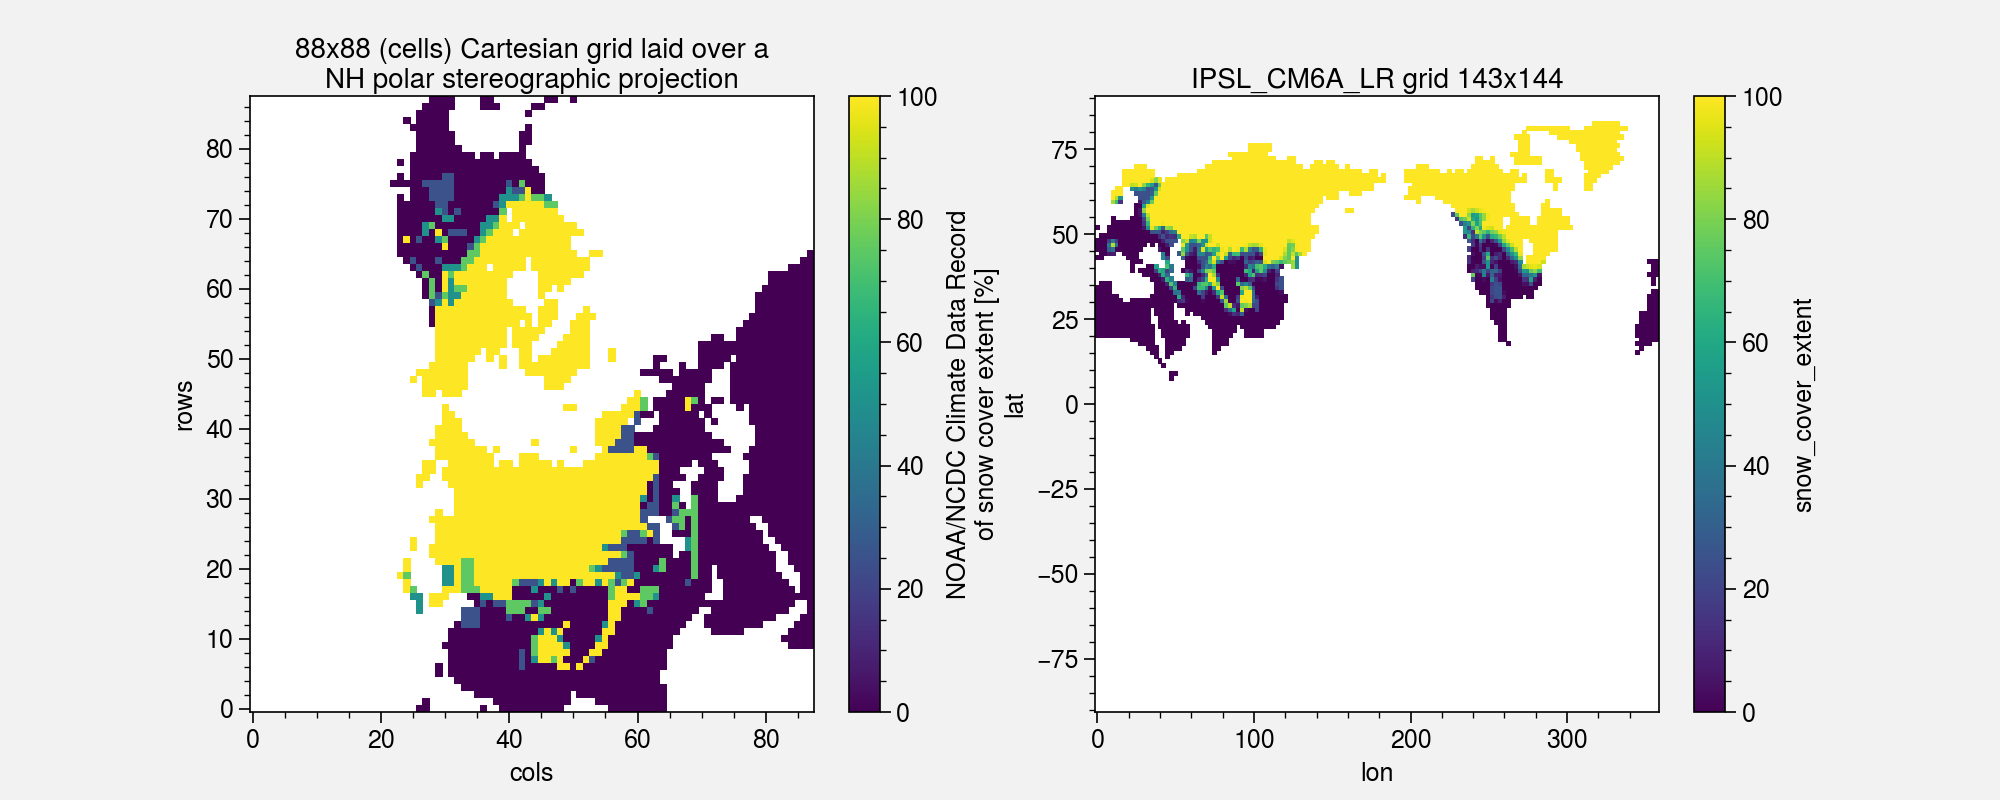

In [9]:
plt.figure(figsize=(10,4))
plt.subplot(121)
obs[0].plot()
plt.title('88x88 (cells) Cartesian grid laid over a\nNH polar stereographic projection')
plt.subplot(122)
obs_regrid[0].plot()
plt.title('IPSL_CM6A_LR grid 143x144')

[#Regrid-HR](#Regrid-HR)

## Other snow dataset
- [IMS Daily Northern Hemisphere Snow and Ice Analysis at 1 km, 4 km, and 24 km Resolutions, Version 1](https://nsidc.org/data/g02156)
- [MEaSUREs Northern Hemisphere Terrestrial Snow Cover Extent Daily 25km EASE-Grid 2.0, Version 1](https://nsidc.org/data/nsidc-0530)

Try with MEaSUREs -> netCDF easier and lighter but smaller period to compare with rutgers to see if it is ok or not... I guess yes for climatic studies (to check)

In [8]:
path_MEaSUREs = '/data/mlalande/MEaSUREs'
ds = xr.open_dataset(path_MEaSUREs+'/nhtsd25e2_20121228_v01r01.nc')
ds

<xarray.Dataset>
Dimensions:                                         (cols: 720, rows: 720, time: 1)
Coordinates:
  * time                                            (time) datetime64[ns] 2012-12-28
    latitude                                        (rows, cols) float32 ...
    longitude                                       (rows, cols) float32 ...
  * rows                                            (rows) int32 8987500 ... -8987500
  * cols                                            (cols) int32 -8987500 ... 8987500
Data variables:
    merged_snow_cover_extent                        (time, rows, cols) float32 ...
    ims_snow_cover_extent                           (time, rows, cols) float32 ...
    passive_microwave_gap_filled_snow_cover_extent  (time, rows, cols) float32 ...
    modis_cloud_gap_filled_snow_cover_extent        (time, rows, cols) float32 ...
    coord_system                                    |S1 ...
Attributes:
    Conventions:               CF-1.6
    Metadata_Conventions:      CF-1.6, Unidata Dataset Discovery v1.0, GDS v2.0
    standard_name_vocabulary:  CF Standard Name Table (v22, 12 February 2013)
    id:                        nhtsd25e2_20121228_v01r01.nc
    naming_authority:          gov.nasa.eosdis
    reference:                 http://dx.doi.org/10.5067/MEASURES/CRYOSPHERE/...
    metadata_link:             http://nsidc.org/api/metadata?id=nsidc-0530
    title:                     MEaSUREs Northern Hemisphere Terrestrial Snow ...
    product_version:           v01r01
    summary:                   This NASA MEaSUREs Earth System Data Record (E...
    keywords:                  EARTH SCIENCE > CRYOSPHERE > SNOW/ICE > SNOW C...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Ear...
    platform:                  NOAA POES (Polar Orbiting Environmental Satell...
    sensor:                    VISSR > Visible and Infrared Spin Scan Radiome...
    cdm_data_type:             Grid
    source:                    ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G0...
    date_created:              2015-06-10T03:01:07Z
    institution:               Center for Environmental Prediction, Rutgers U...
    geospatial_lat_units:      degrees_north
    geospatial_lon_units:      degrees_east
    geospatial_lat_min:        0
    geospatial_lat_max:        90
    geospatial_lon_min:        -180
    geospatial_lon_max:        180
    spatial_resolution:        25 km
    license:                   No restrictions on access or use

In [9]:
ds.merged_snow_cover_extent

<xarray.DataArray 'merged_snow_cover_extent' (time: 1, rows: 720, cols: 720)>
[518400 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-12-28
    latitude   (rows, cols) float32 ...
    longitude  (rows, cols) float32 ...
  * rows       (rows) int32 8987500 8962500 8937500 ... -8962500 -8987500
  * cols       (cols) int32 -8987500 -8962500 -8937500 ... 8962500 8987500
Attributes:
    flag_meanings:  modis_microwave_ims_report_snow modis_microwave_report_sn...
    flag_values:    [10 11 12 13 14 15 16 20 30 40]
    comment:        10: Snow cover reported by modis_cloud_gap_filled, passiv...
    valid_range:    [10 40]
    long_name:      Merged Snow Cover Extent
    grid_mapping:   coord_system

In [10]:
ds.merged_snow_cover_extent.flag_meanings

'modis_microwave_ims_report_snow modis_microwave_report_snow modis_ims_report_snow microwave_ims_report_snow modis_only_reports_snow microwave_only_reports_snow ims_only_reports_snow snow_free_land permanent_ice ocean'

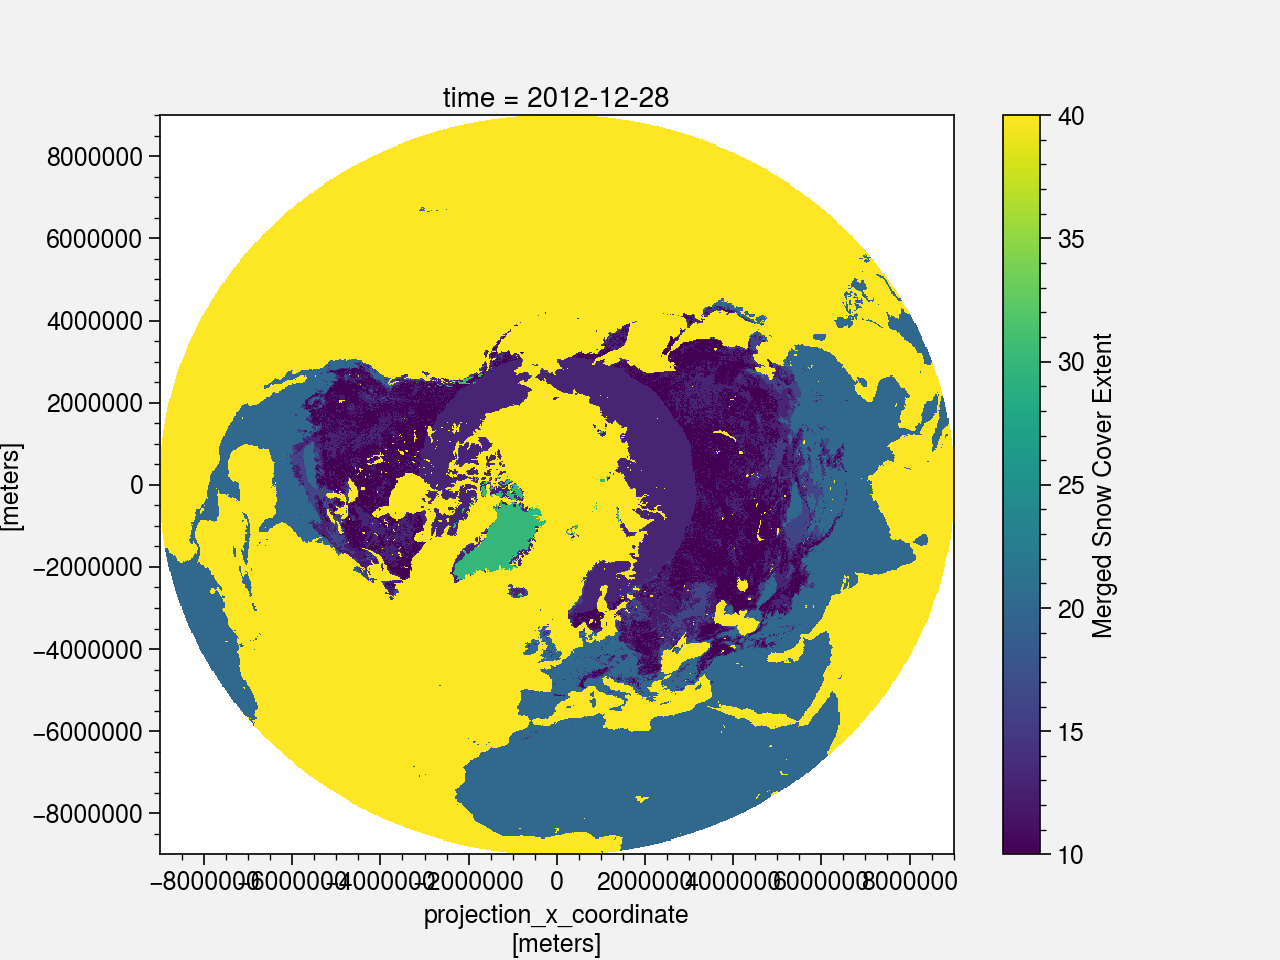

In [11]:
ds.merged_snow_cover_extent[0].plot()

<IPython.core.display.Javascript object>


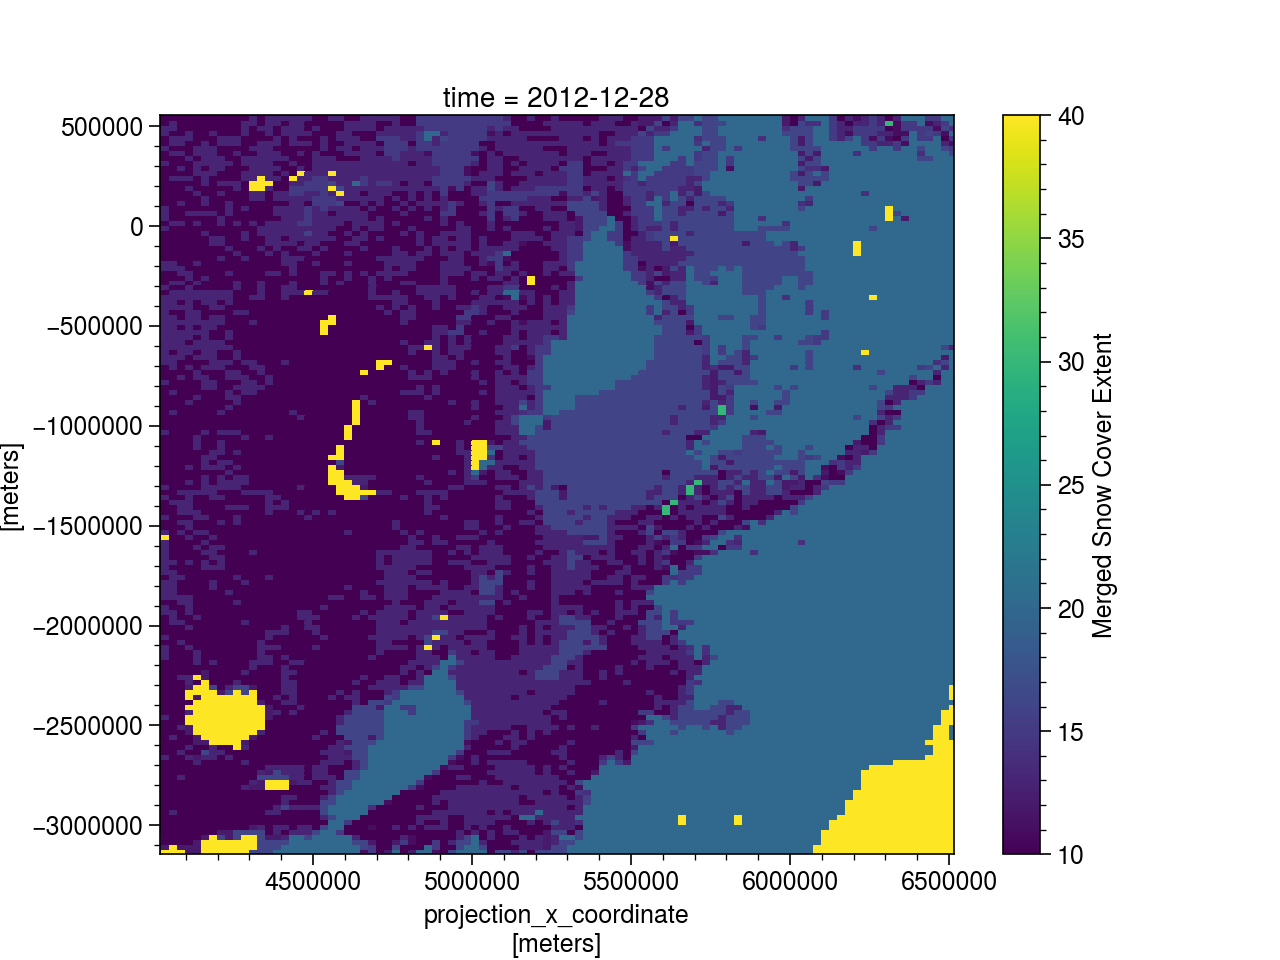

In [12]:
%matplotlib notebook
plt.figure()
ds.merged_snow_cover_extent[0].plot()

In [77]:
# Get land-free (best way to get the snow?)
land_free = test.merged_snow_cover_extent[0].where(test.merged_snow_cover_extent[0] == 20)

# Get ocean
ocean = test.merged_snow_cover_extent[0].where(test.merged_snow_cover_extent[0] == 40)

snow_ocean = (land_free*0).fillna(1)
snow_borders_not_masked = snow_ocean + ocean.fillna(0).where(ocean.fillna(0) == 0)
snow = snow_borders_not_masked + test.merged_snow_cover_extent[0]*0

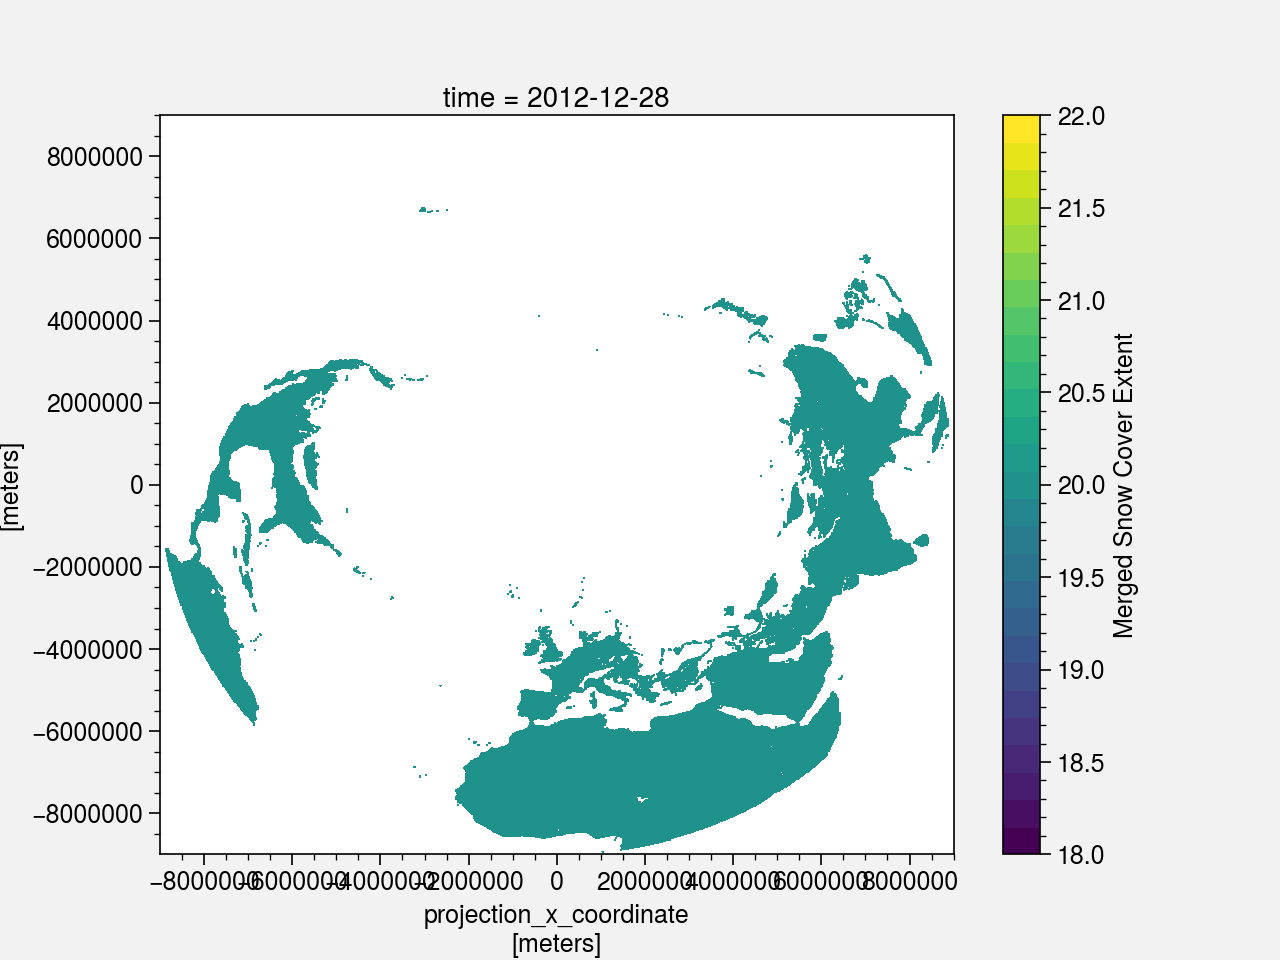

In [116]:
land_free.plot()

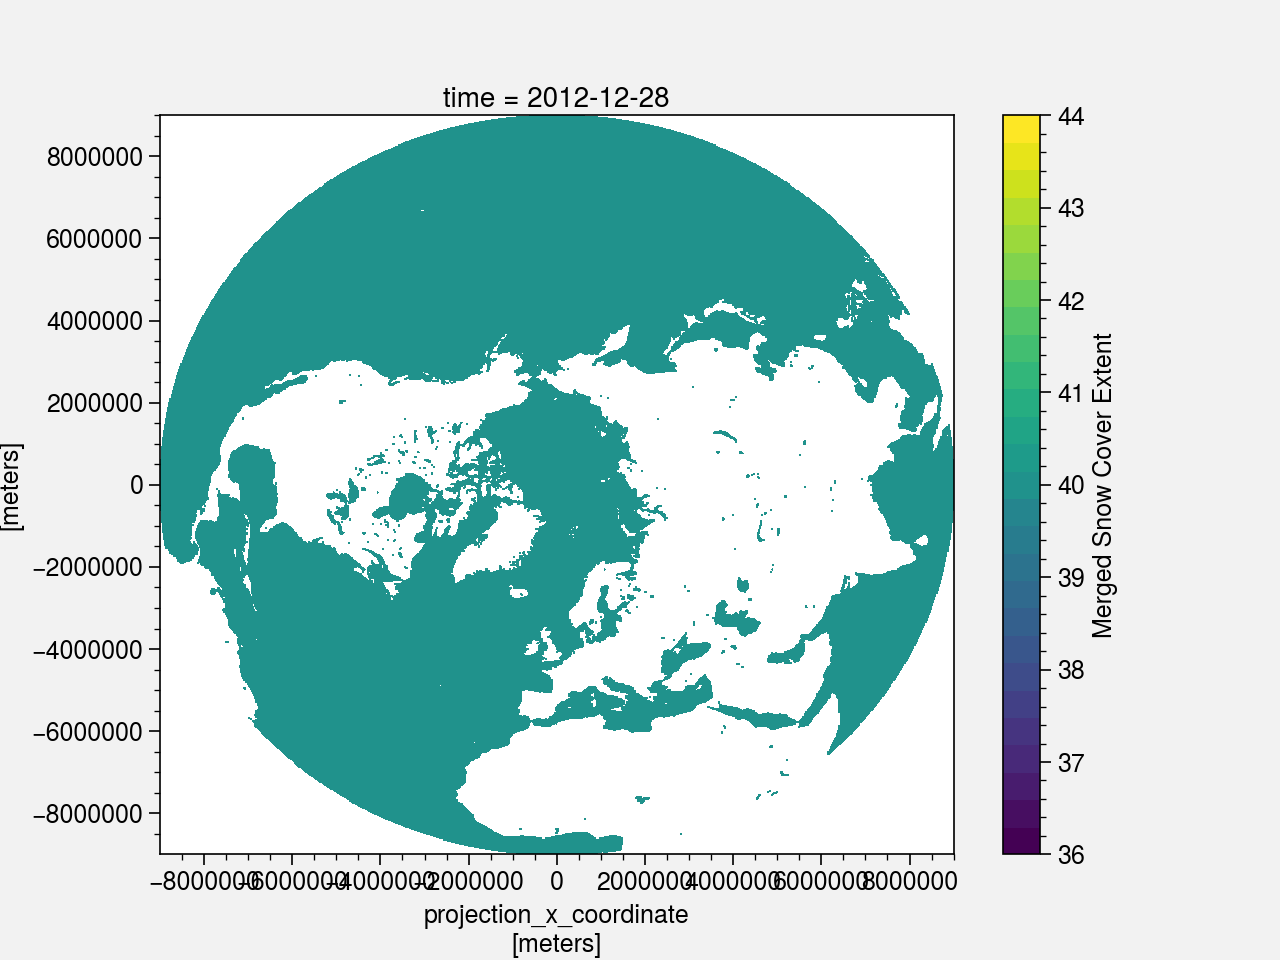

In [117]:
ocean.plot()

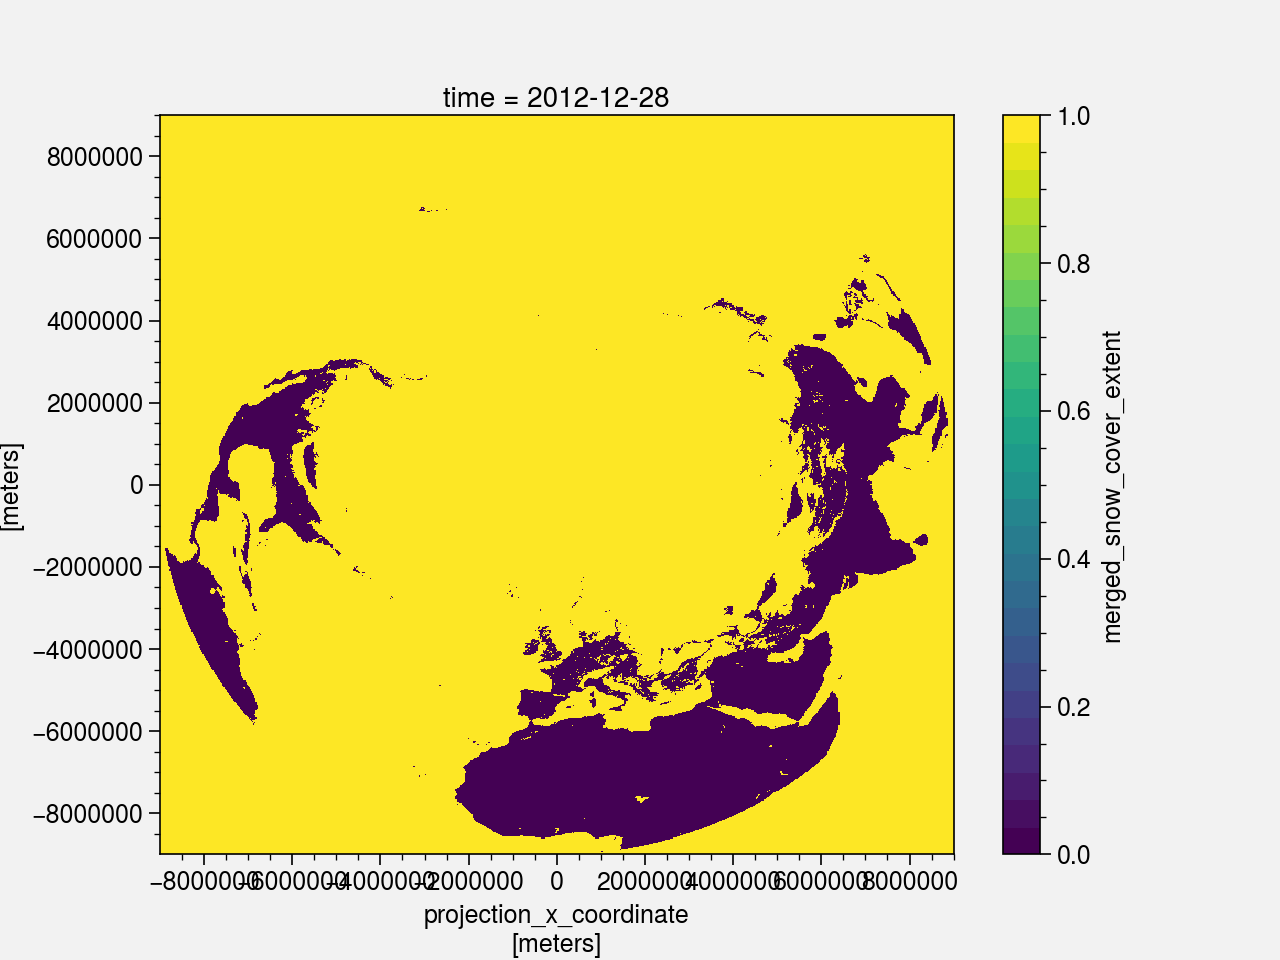

In [118]:
snow_ocean.plot()

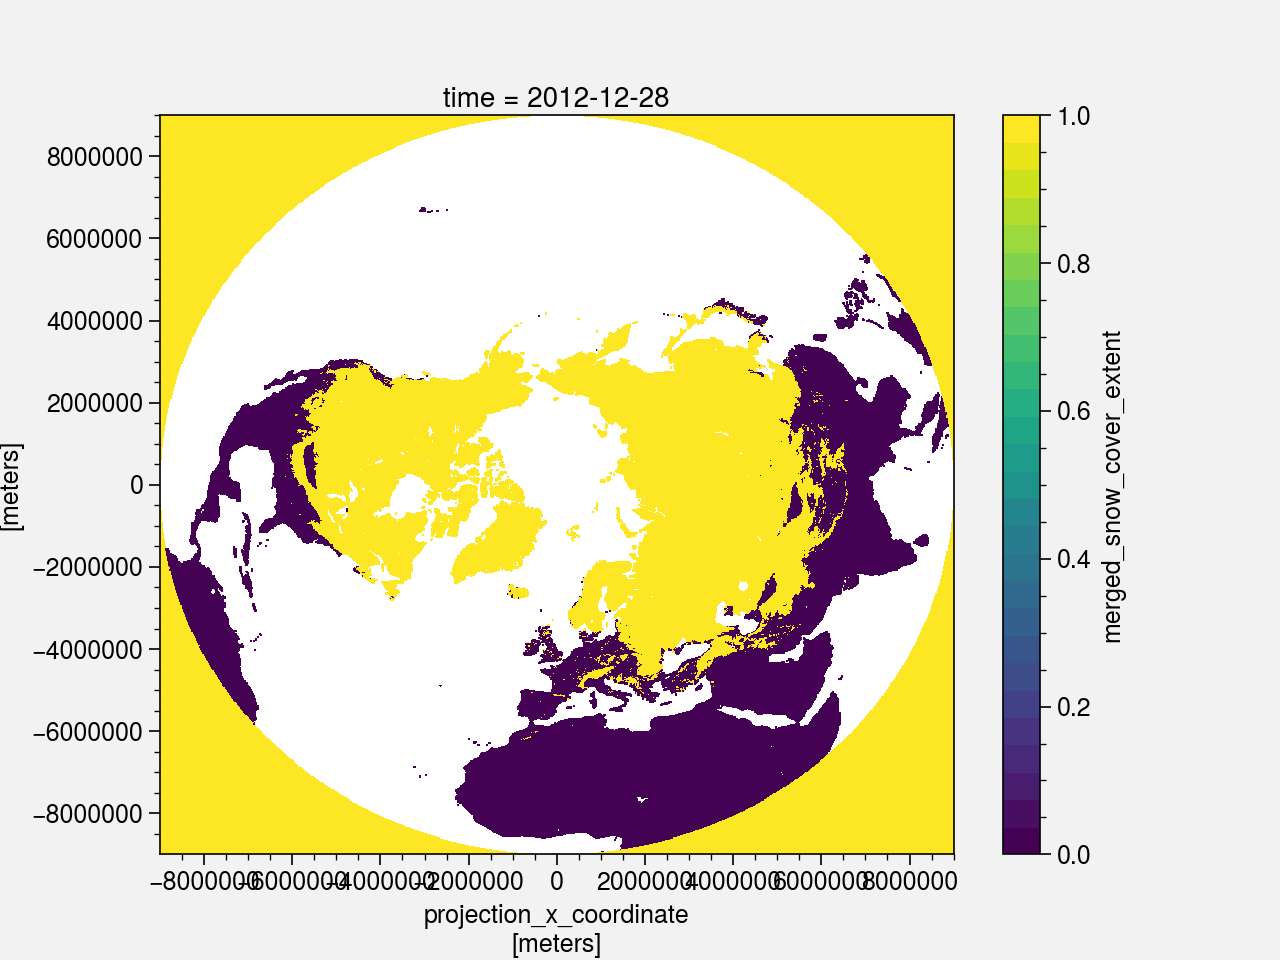

In [120]:
snow_borders_not_masked.plot()

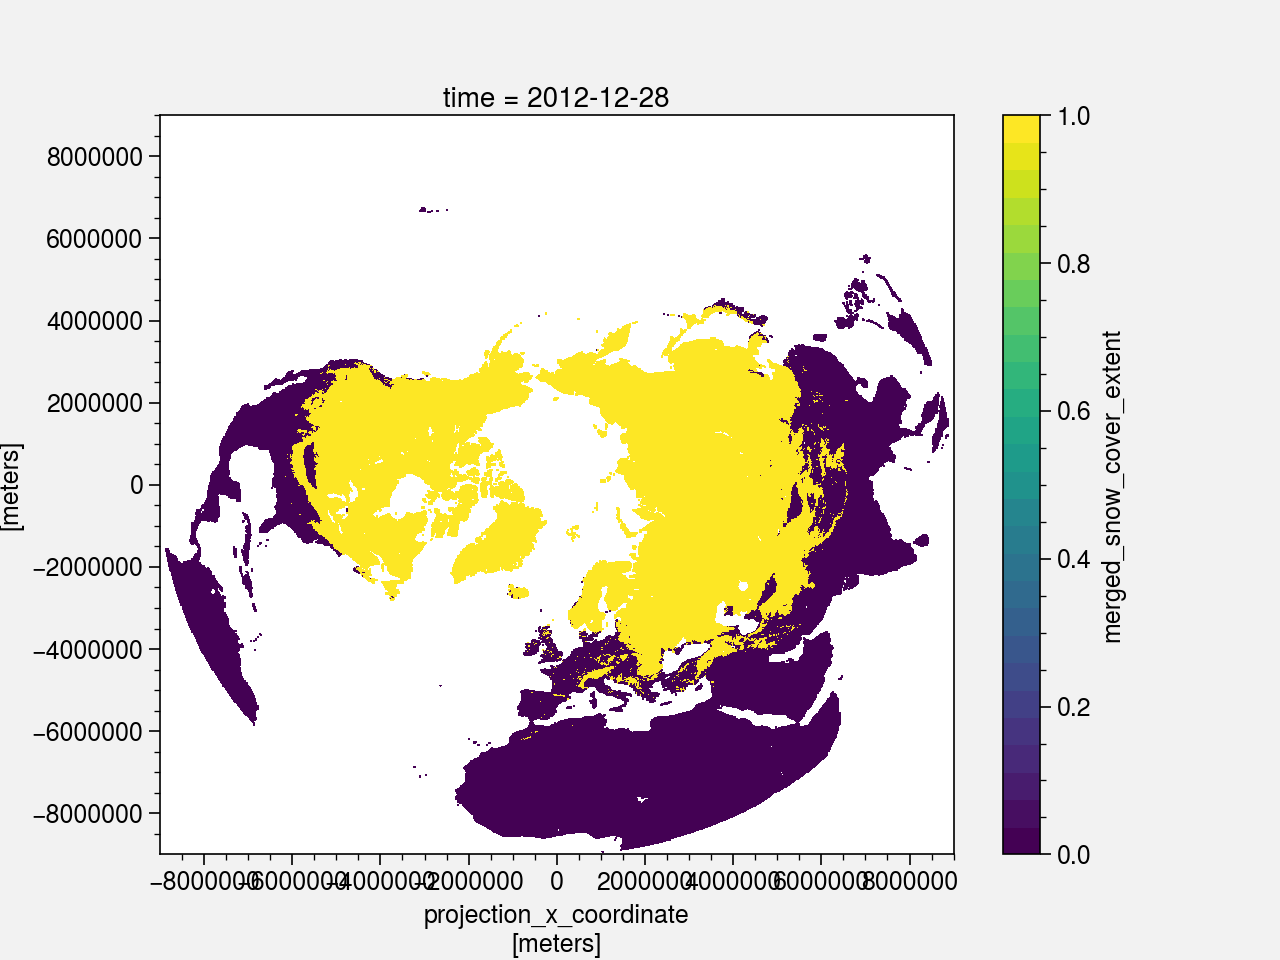

In [121]:
snow.plot()

In [124]:
a = snow.rename({'latitude': 'lat', 'longitude': 'lon'})

In [130]:
# For adding NaN values outside of the grid, otherwise it puts 0 (see issue just up #15)
import scipy
def add_matrix_NaNs(regridder):
    X = regridder.weights
    M = scipy.sparse.csr_matrix(X)
    num_nonzeros = np.diff(M.indptr)
    M[num_nonzeros == 0, 0] = np.NaN
    regridder.weights = scipy.sparse.coo_matrix(M)
    return regridder

# Make the regrider
regridder_test = xe.Regridder(a, da_historical, 'bilinear', periodic=False)
regridder_test = add_matrix_NaNs(regridder_test)
print(regridder_test)

# Regrid the data
test_regrid = regridder_test(a)

Overwrite existing file: bilinear_720x720_143x144.nc 
 You can set reuse_weights=True to save computing time.


/data/mlalande/miniconda3/envs/xesmf/lib/python3.8/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_720x720_143x144.nc 
Reuse pre-computed weights? False 
Input grid shape:           (720, 720) 
Output grid shape:          (143, 144) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False


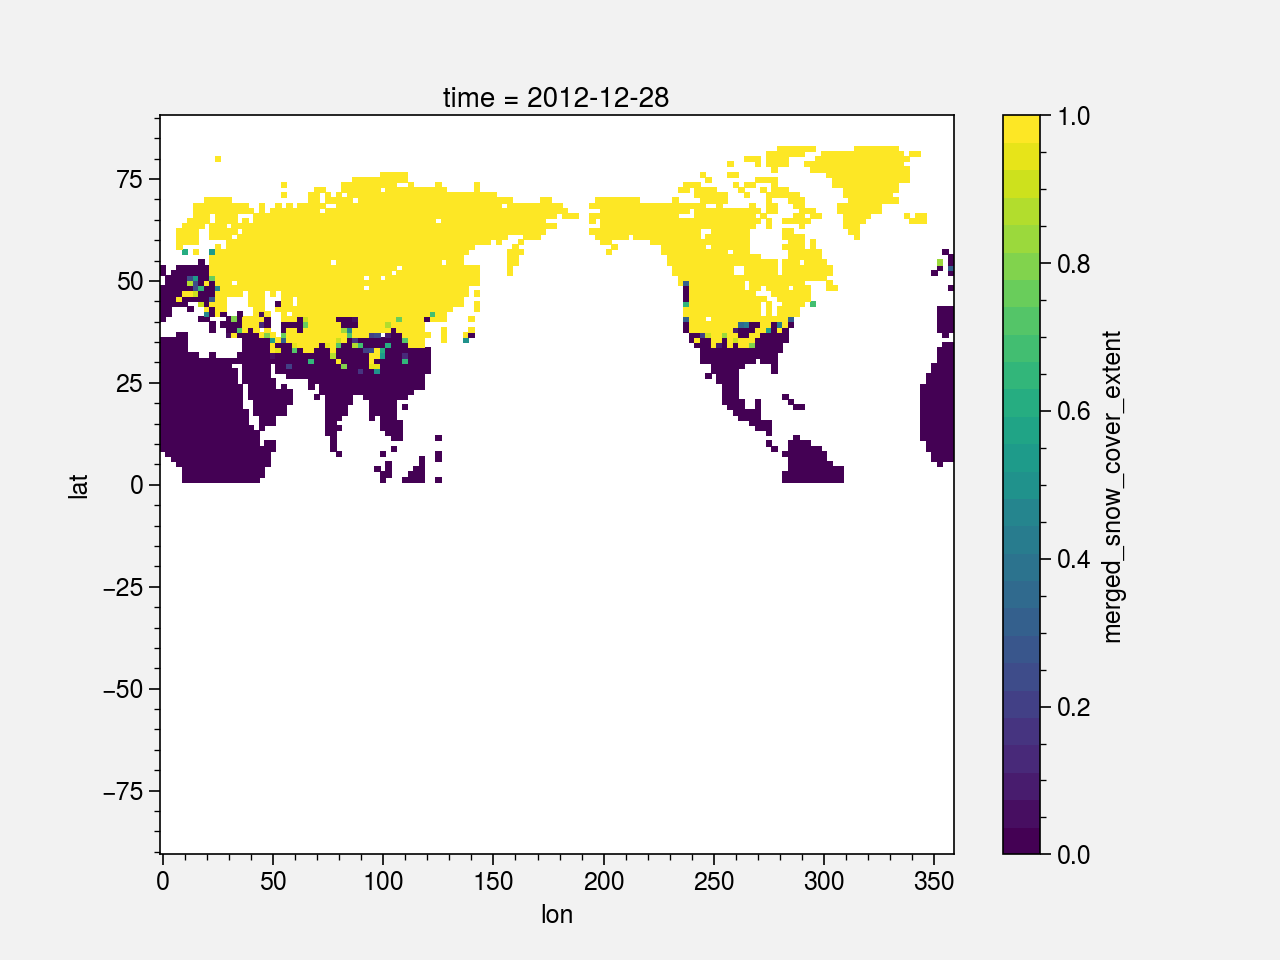

In [128]:
test_regrid.plot()

## Make monthly data of MEaSUREs

In [198]:
path_MEaSUREs = '/data/mlalande/MEaSUREs'

for year in plot.arange(1999,2012):
    for month in plot.arange(1,12):
        string = str(year) + str(month).zfill(2)
        print(string)
        da = xr.open_mfdataset(
            path_MEaSUREs+'/nhtsd25e2_'+string+'*_v01r01.nc', combine='by_coords'
        ).merged_snow_cover_extent
        
        # Get snow cover
        land_free = da.where(da == 20)
        ocean = da.where(da == 40)
        snow_ocean = (land_free*0).fillna(1)
        snow_borders_not_masked = snow_ocean + ocean.fillna(0).where(ocean.fillna(0) == 0)
        snow = snow_borders_not_masked + da*0
        
        # Save it and keep the time dimension (1rst day as label)
        snow.mean(
            'time', skipna=False
        ).assign_coords(time=snow.time[0]).expand_dims('time').to_netcdf(
            path_MEaSUREs+'/monthly/nhtsd25e2_'+string+'_v01r01.nc'
        )  

199901
199902
199903
199904
199905
199906
199907
199908
199909
199910
199911
199912
200001
200002
200003
200004
200005
200006
200007
200008
200009
200010
200011
200012
200101
200102
200103
200104
200105
200106
200107
200108
200109
200110
200111
200112
200201
200202
200203
200204
200205
200206
200207
200208
200209
200210
200211
200212
200301
200302
200303
200304
200305
200306
200307
200308
200309
200310
200311
200312
200401
200402
200403
200404
200405
200406
200407
200408
200409
200410
200411
200412
200501
200502
200503
200504
200505
200506
200507
200508
200509
200510
200511
200512
200601
200602
200603
200604
200605
200606
200607
200608
200609
200610
200611
200612
200701
200702
200703
200704
200705
200706
200707
200708
200709
200710
200711
200712
200801
200802
200803
200804
200805
200806
200807
200808
200809
200810
200811
200812
200901
200902
200903
200904
200905
200906
200907
200908
200909
200910
200911
200912
201001
201002
201003
201004
201005
201006
201007
201008
201009
201010
201011

## Read MEaSUREs monthly data and compare to NOAA CDR on the same period

In [200]:
path_MEaSUREs = '/data/mlalande/MEaSUREs/monthly'
obs_MEaSUREs = xr.open_mfdataset(
    path_MEaSUREs+'/nhtsd25e2_*_v01r01.nc', combine='by_coords'
).merged_snow_cover_extent
obs_MEaSUREs.load()

<xarray.DataArray 'merged_snow_cover_extent' (time: 168, rows: 720, cols: 720)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
    latitude   (rows, cols) float32 nan nan nan nan nan ... nan nan nan nan nan
    longitude  (rows, cols) float32 nan nan nan nan nan ... nan nan nan nan nan
  * cols       (cols) int32 -8987500 -8962500 -8937500 ... 8962500 8987500
  * rows       (rows) int32 8987500 8962500 8937500 ... -8962500 -8987500
  * time       (time) datetime64[ns] 1999-01-01 1999-02-01 ... 2012-12-01

#### Regrid

In [201]:
obs_MEaSUREs = obs_MEaSUREs.rename({'latitude': 'lat', 'longitude': 'lon'})

In [202]:
# For adding NaN values outside of the grid, otherwise it puts 0 (see issue just up #15)
import scipy
def add_matrix_NaNs(regridder):
    X = regridder.weights
    M = scipy.sparse.csr_matrix(X)
    num_nonzeros = np.diff(M.indptr)
    M[num_nonzeros == 0, 0] = np.NaN
    regridder.weights = scipy.sparse.coo_matrix(M)
    return regridder

# Make the regrider
regridder_MEaSUREs = xe.Regridder(obs_MEaSUREs, da_historical, 'bilinear', periodic=False)
regridder_MEaSUREs = add_matrix_NaNs(regridder_MEaSUREs)
print(regridder_MEaSUREs)

# Regrid the data
MEaSUREs_regrid = regridder_MEaSUREs(obs_MEaSUREs)

Overwrite existing file: bilinear_720x720_143x144.nc 
 You can set reuse_weights=True to save computing time.


/data/mlalande/miniconda3/envs/xesmf/lib/python3.8/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_720x720_143x144.nc 
Reuse pre-computed weights? False 
Input grid shape:           (720, 720) 
Output grid shape:          (143, 144) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False


#### Monthly mean

In [214]:
latlim=(10,50)
lonlim=(60,110)

mon_MEaSUREs_regrid = MEaSUREs_regrid.sel(
    lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])
).groupby('time.month').mean('time').load()

# Attention à sélectionner la même période
obs_mon = obs_regrid.sel(
    time=slice('1999','2012'), lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])
).groupby('time.month').mean('time').load()

/data/mlalande/miniconda3/envs/xesmf/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


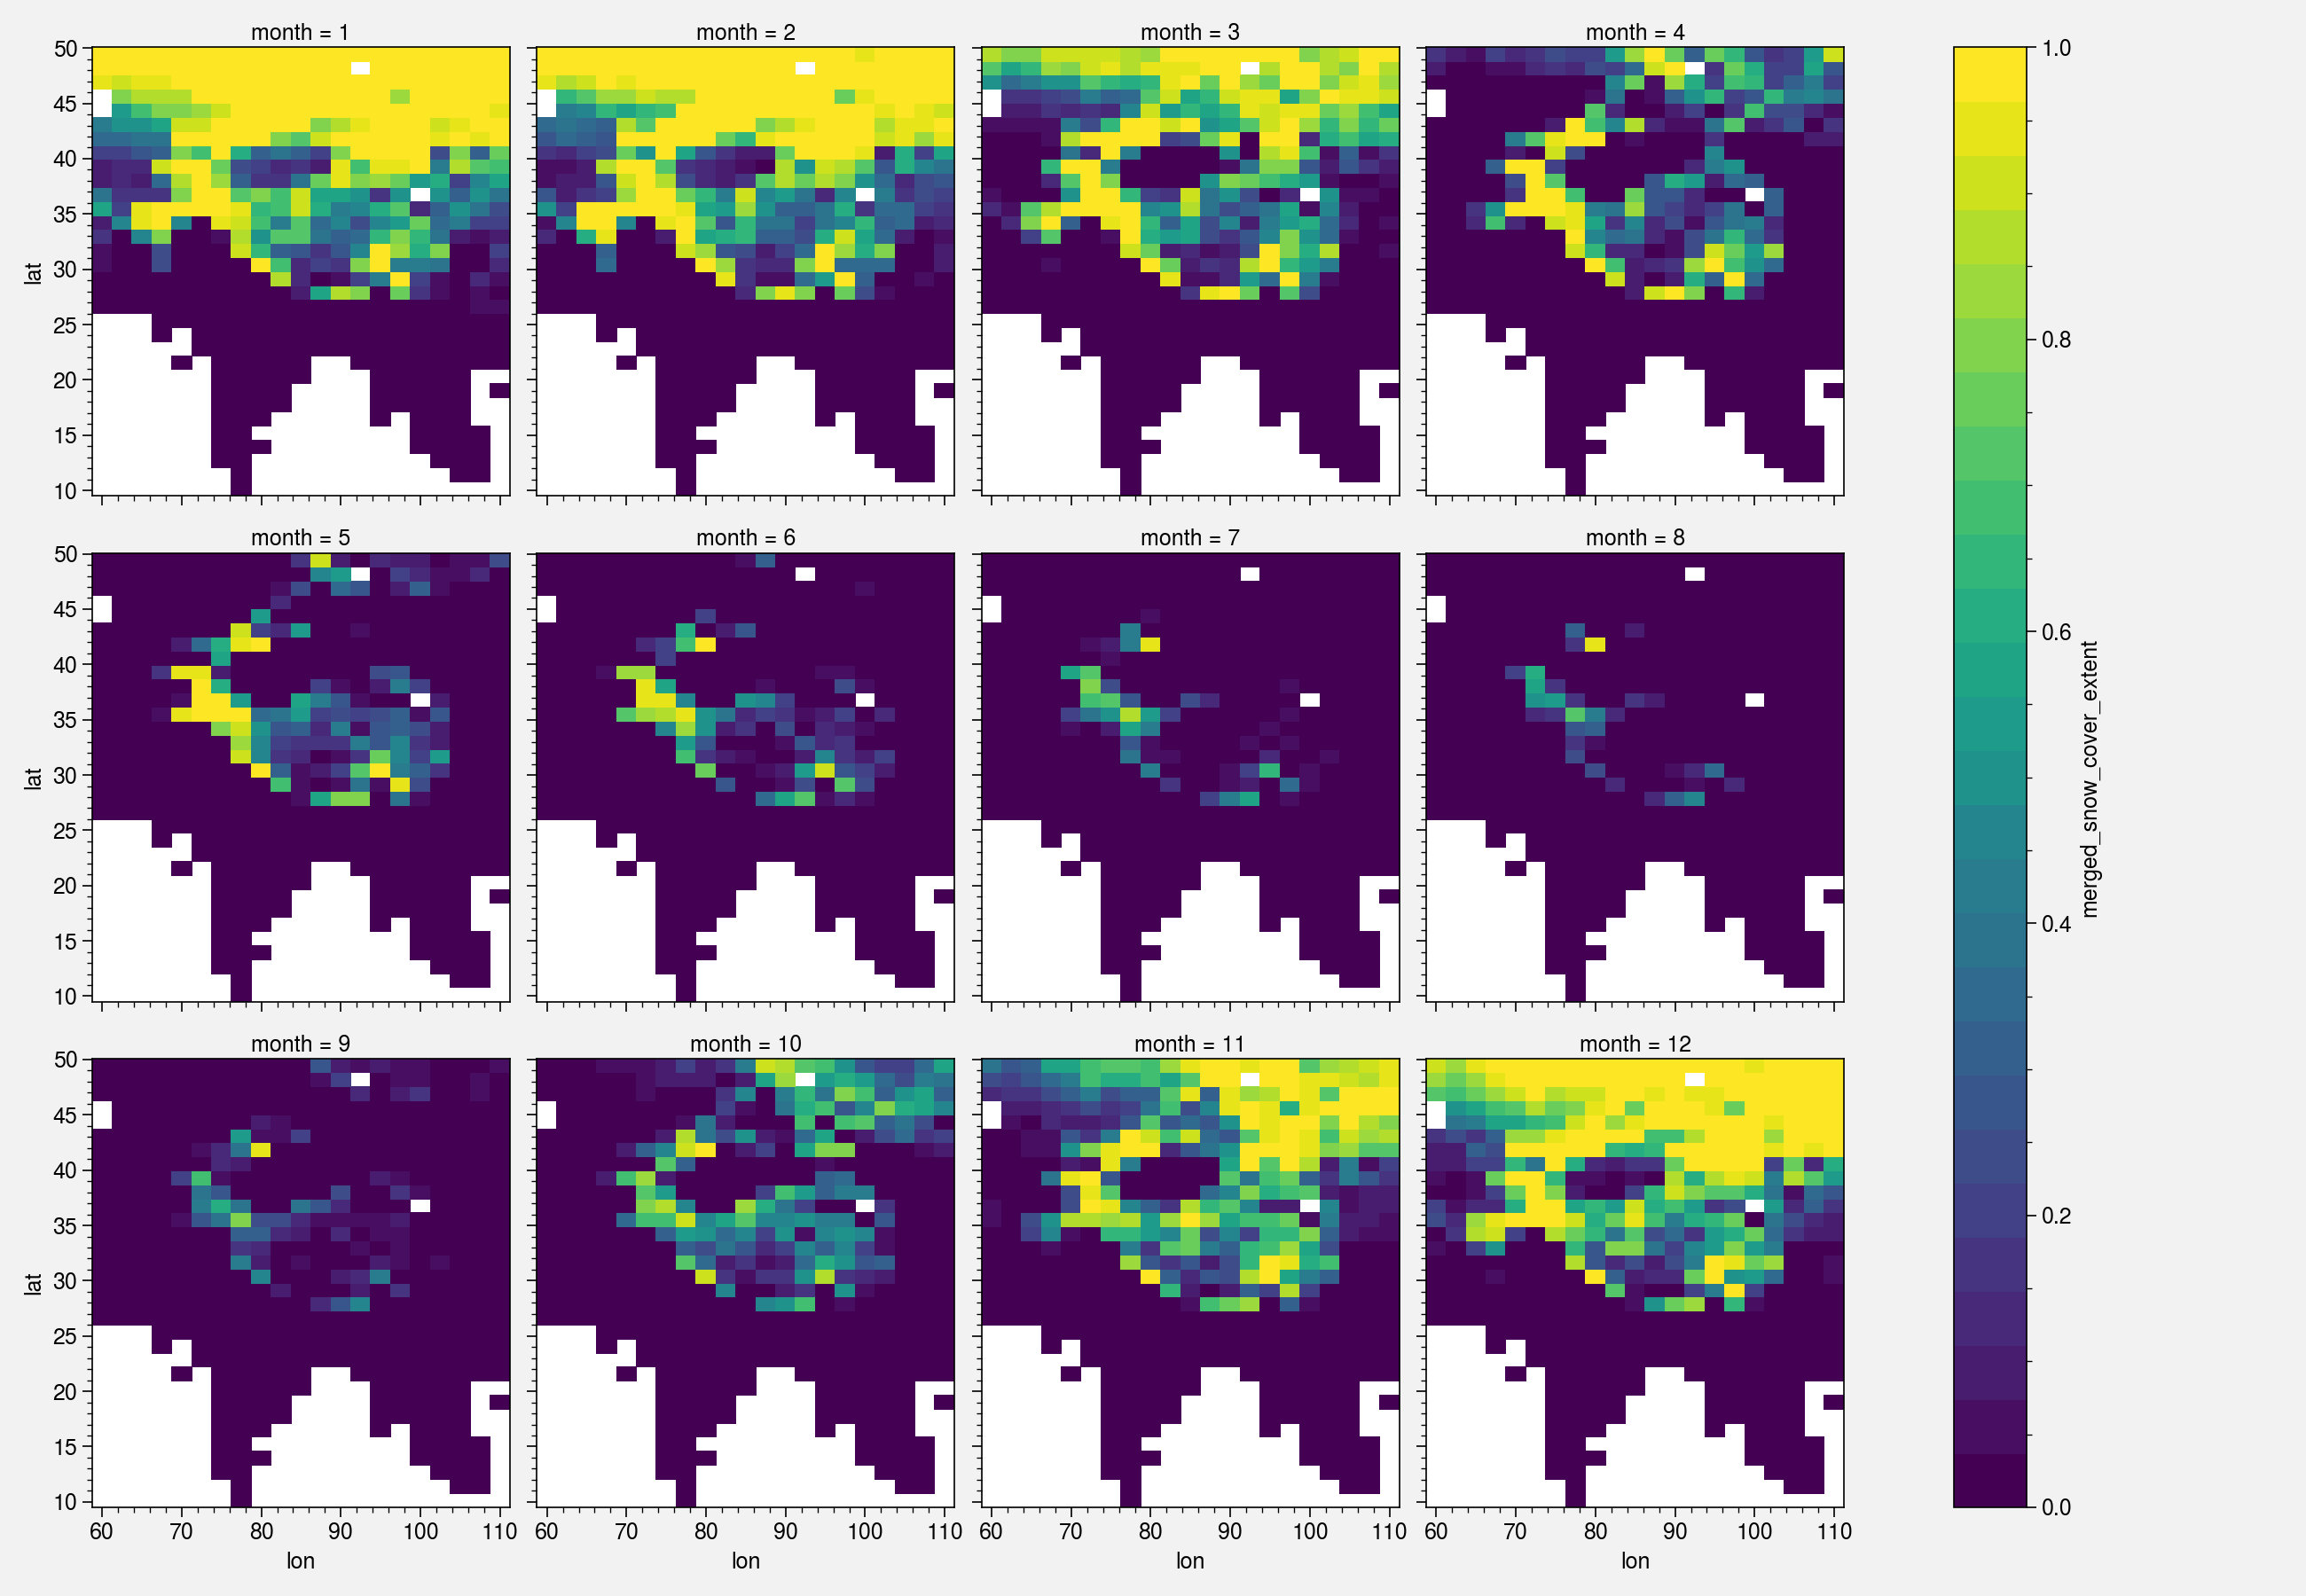

In [215]:
mon_MEaSUREs_regrid.plot(col='month', col_wrap=4, robust=False)

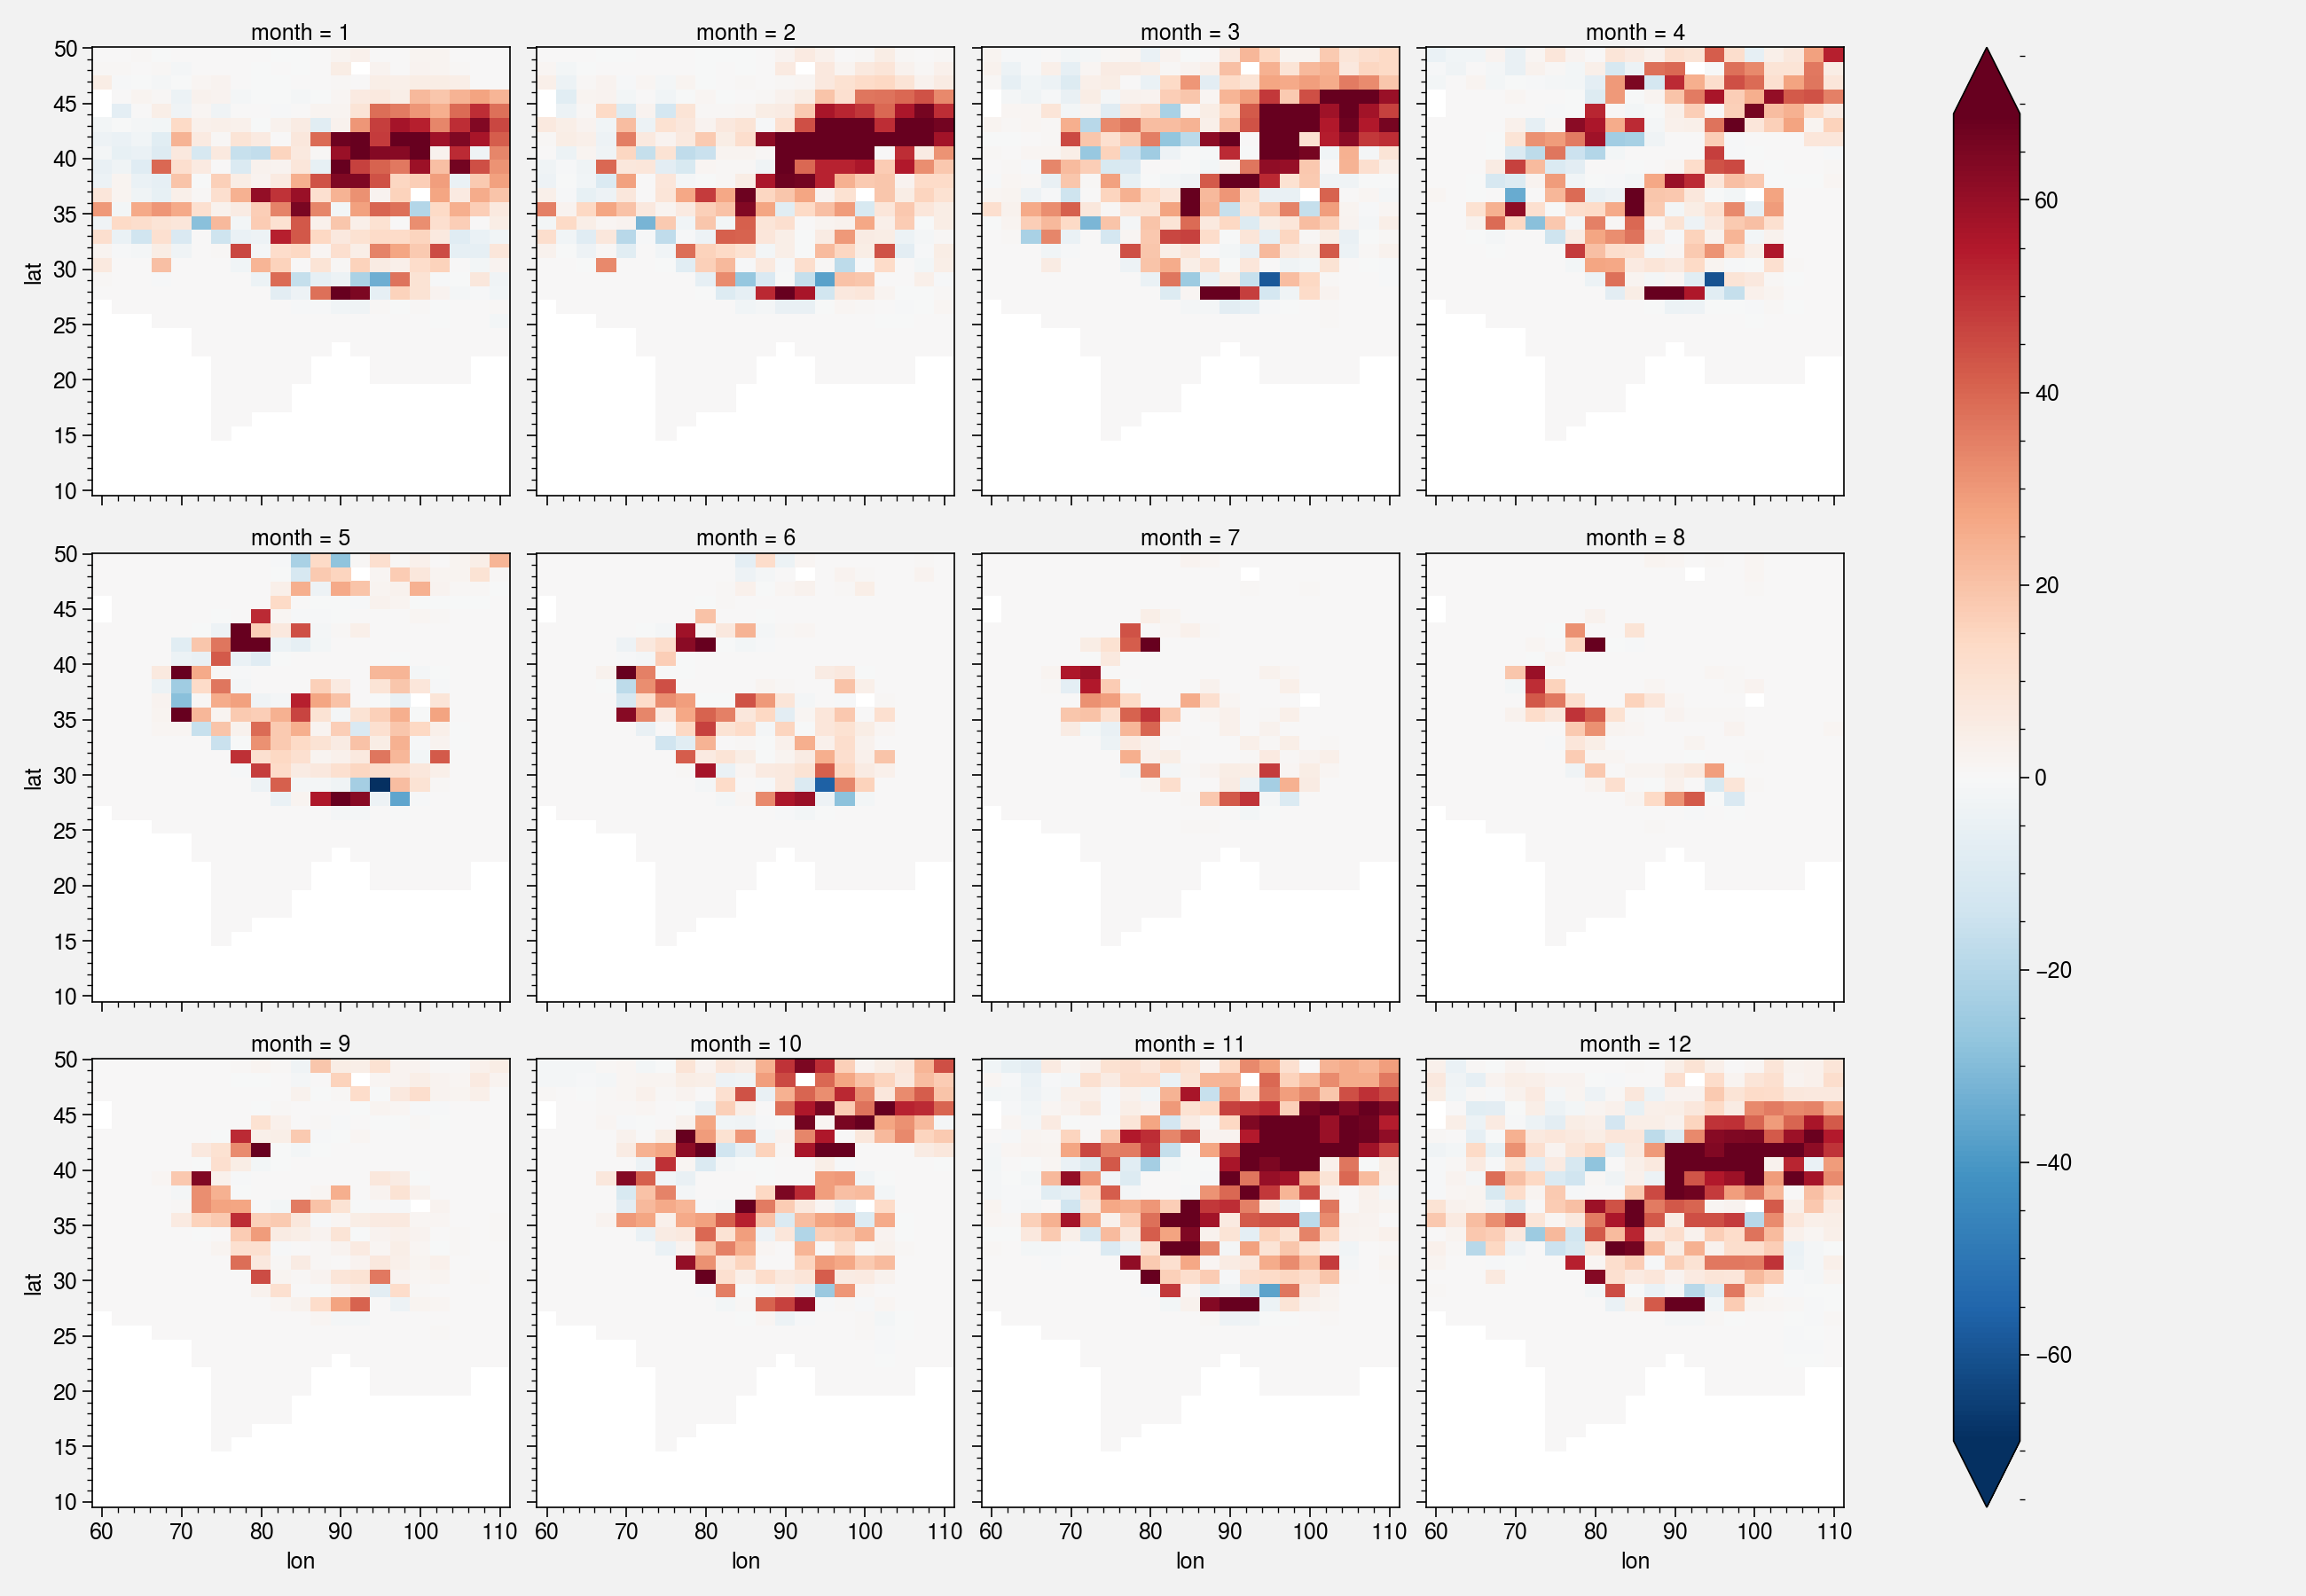

In [216]:
(mon_MEaSUREs_regrid*100-obs_mon).plot(col='month', col_wrap=4, robust=True)

In [230]:
bias = mon_MEaSUREs_regrid.mean('month')*100-obs_mon.mean('month')

/data/mlalande/miniconda3/envs/xesmf/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [231]:
bias.min()

<xarray.DataArray ()>
array(-36.05656454)
Coordinates:
    snow_cover_threshold  float32 0.42

In [232]:
bias.max()

<xarray.DataArray ()>
array(64.43093399)
Coordinates:
    snow_cover_threshold  float32 0.42

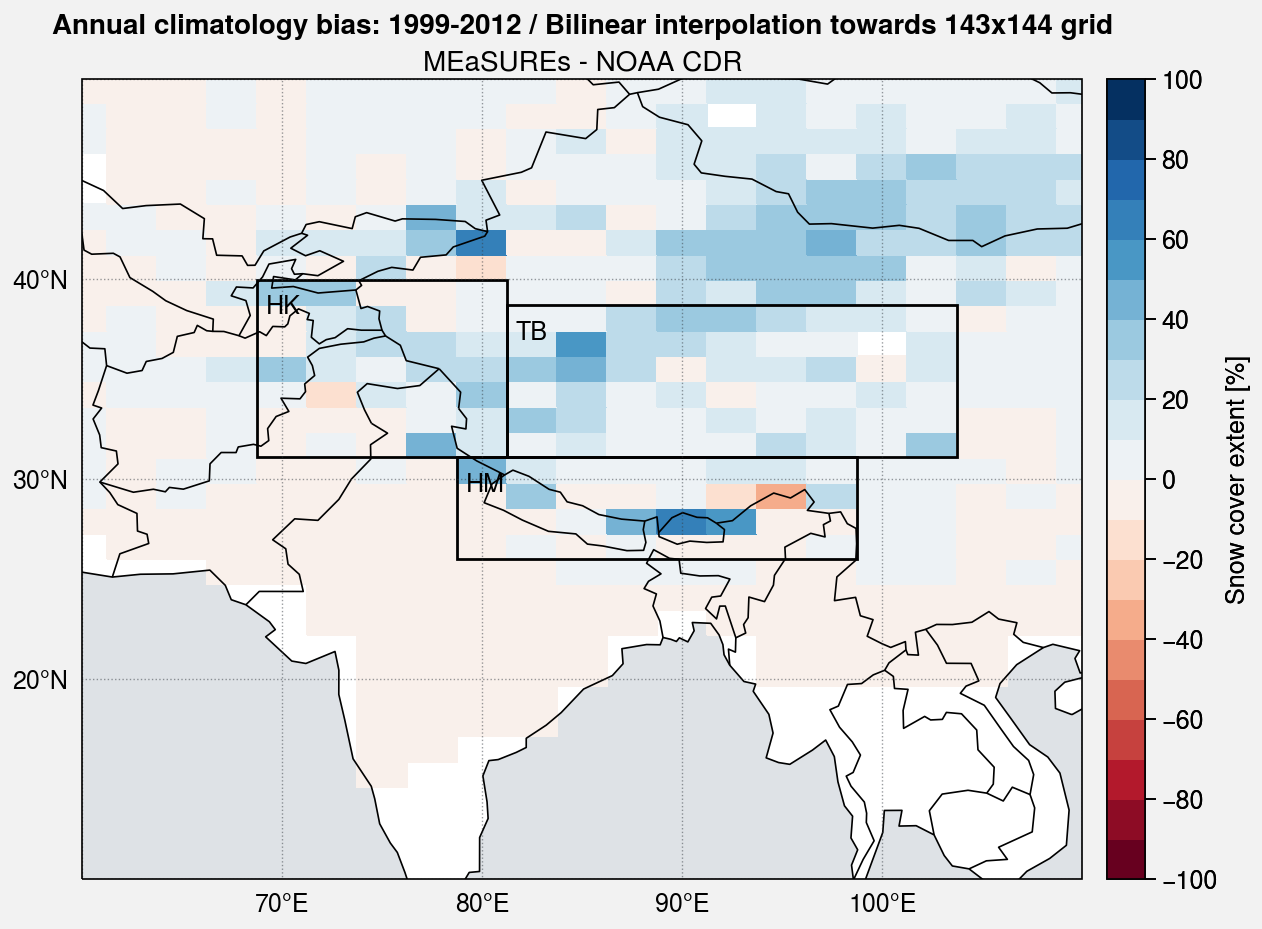

In [239]:
# Final plot

f, axs = plot.subplots(proj='cyl', ncols=1, nrows=1, share=3, axwidth=5)

for i, ax in enumerate(axs):
    m = ax.pcolormesh(
        bias, 
        cmap='RdBu', 
        levels=plot.arange(-100,100,10), 
#         extend='both',
#         norm='midpoint'
    )
    ax.format(title='MEaSUREs - NOAA CDR')

f.colorbar(m, label=var_label)

# Add boxes
for ax in axs:
    u.plot_zones_IPSL_CM6A_LR(ax)

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    suptitle="Annual climatology bias: 1999-2012 / Bilinear interpolation towards 143x144 grid",
    lonlines=10, latlines=10, abc=False, latlim=latlim, lonlim=lonlim
)

# f.save('img/'+var+'/'+var+'_MEaSUREs-NOAA_CDR_bias.png')